In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:


def rewrite_geant4_csv_header(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    # Extract column names from metadata
    column_names = []
    data_start_index = 0
    for i, line in enumerate(lines):
        if line.startswith("#column"):
            match = re.match(r"#column\s+\w+\s+(\w+)", line)
            if match:
                column_names.append(match.group(1))
        elif not line.startswith("#"):
            data_start_index = i
            break

    # Write new file with standard header
    with open(output_path, 'w') as outfile:
        outfile.write(",".join(column_names) + "\n")  # new header
        for line in lines[data_start_index:]:
            outfile.write(line)

def Getinfo(f1,f2):
    rewrite_geant4_csv_header(f1,f2)
    return pd.read_csv(f2)

    


In [3]:
G4Result=Getinfo("../debug/out_nt_Geant4Hits_t0.csv", "Geant4Hits_clean.csv")
OptResult=Getinfo("../debug/out_nt_OpticksHits_t0.csv", "OpticksHits_clean.csv")
PhotonInfo=Getinfo("../debug/out_nt_PhotonInfo_t0.csv", "PhotonInfo_clean.csv")



In [4]:
#G4
#evtID,SensorID,SensorName,x,y,z,t,wavelength,ProcessID

#Opticks
#evtID,hit_Id,SensorID,x,y,z,t,wavelength

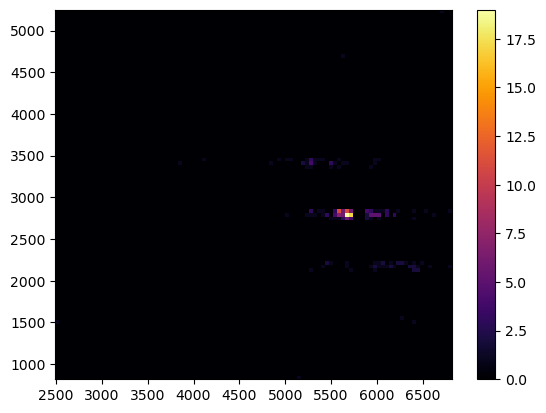

In [11]:
_=plt.hist2d(OptResult['z'],OptResult['y'],bins=100,cmin=0,cmax=200,cmap="inferno")

plt.colorbar()

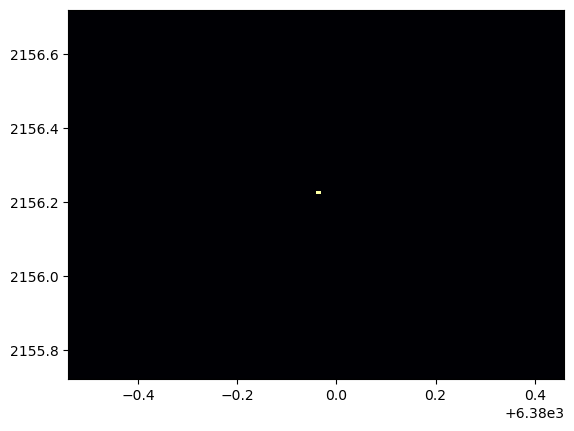

In [12]:
_=plt.hist2d(G4Result['z'],G4Result['y'],bins=100,cmin=0,cmax=10,cmap="inferno")

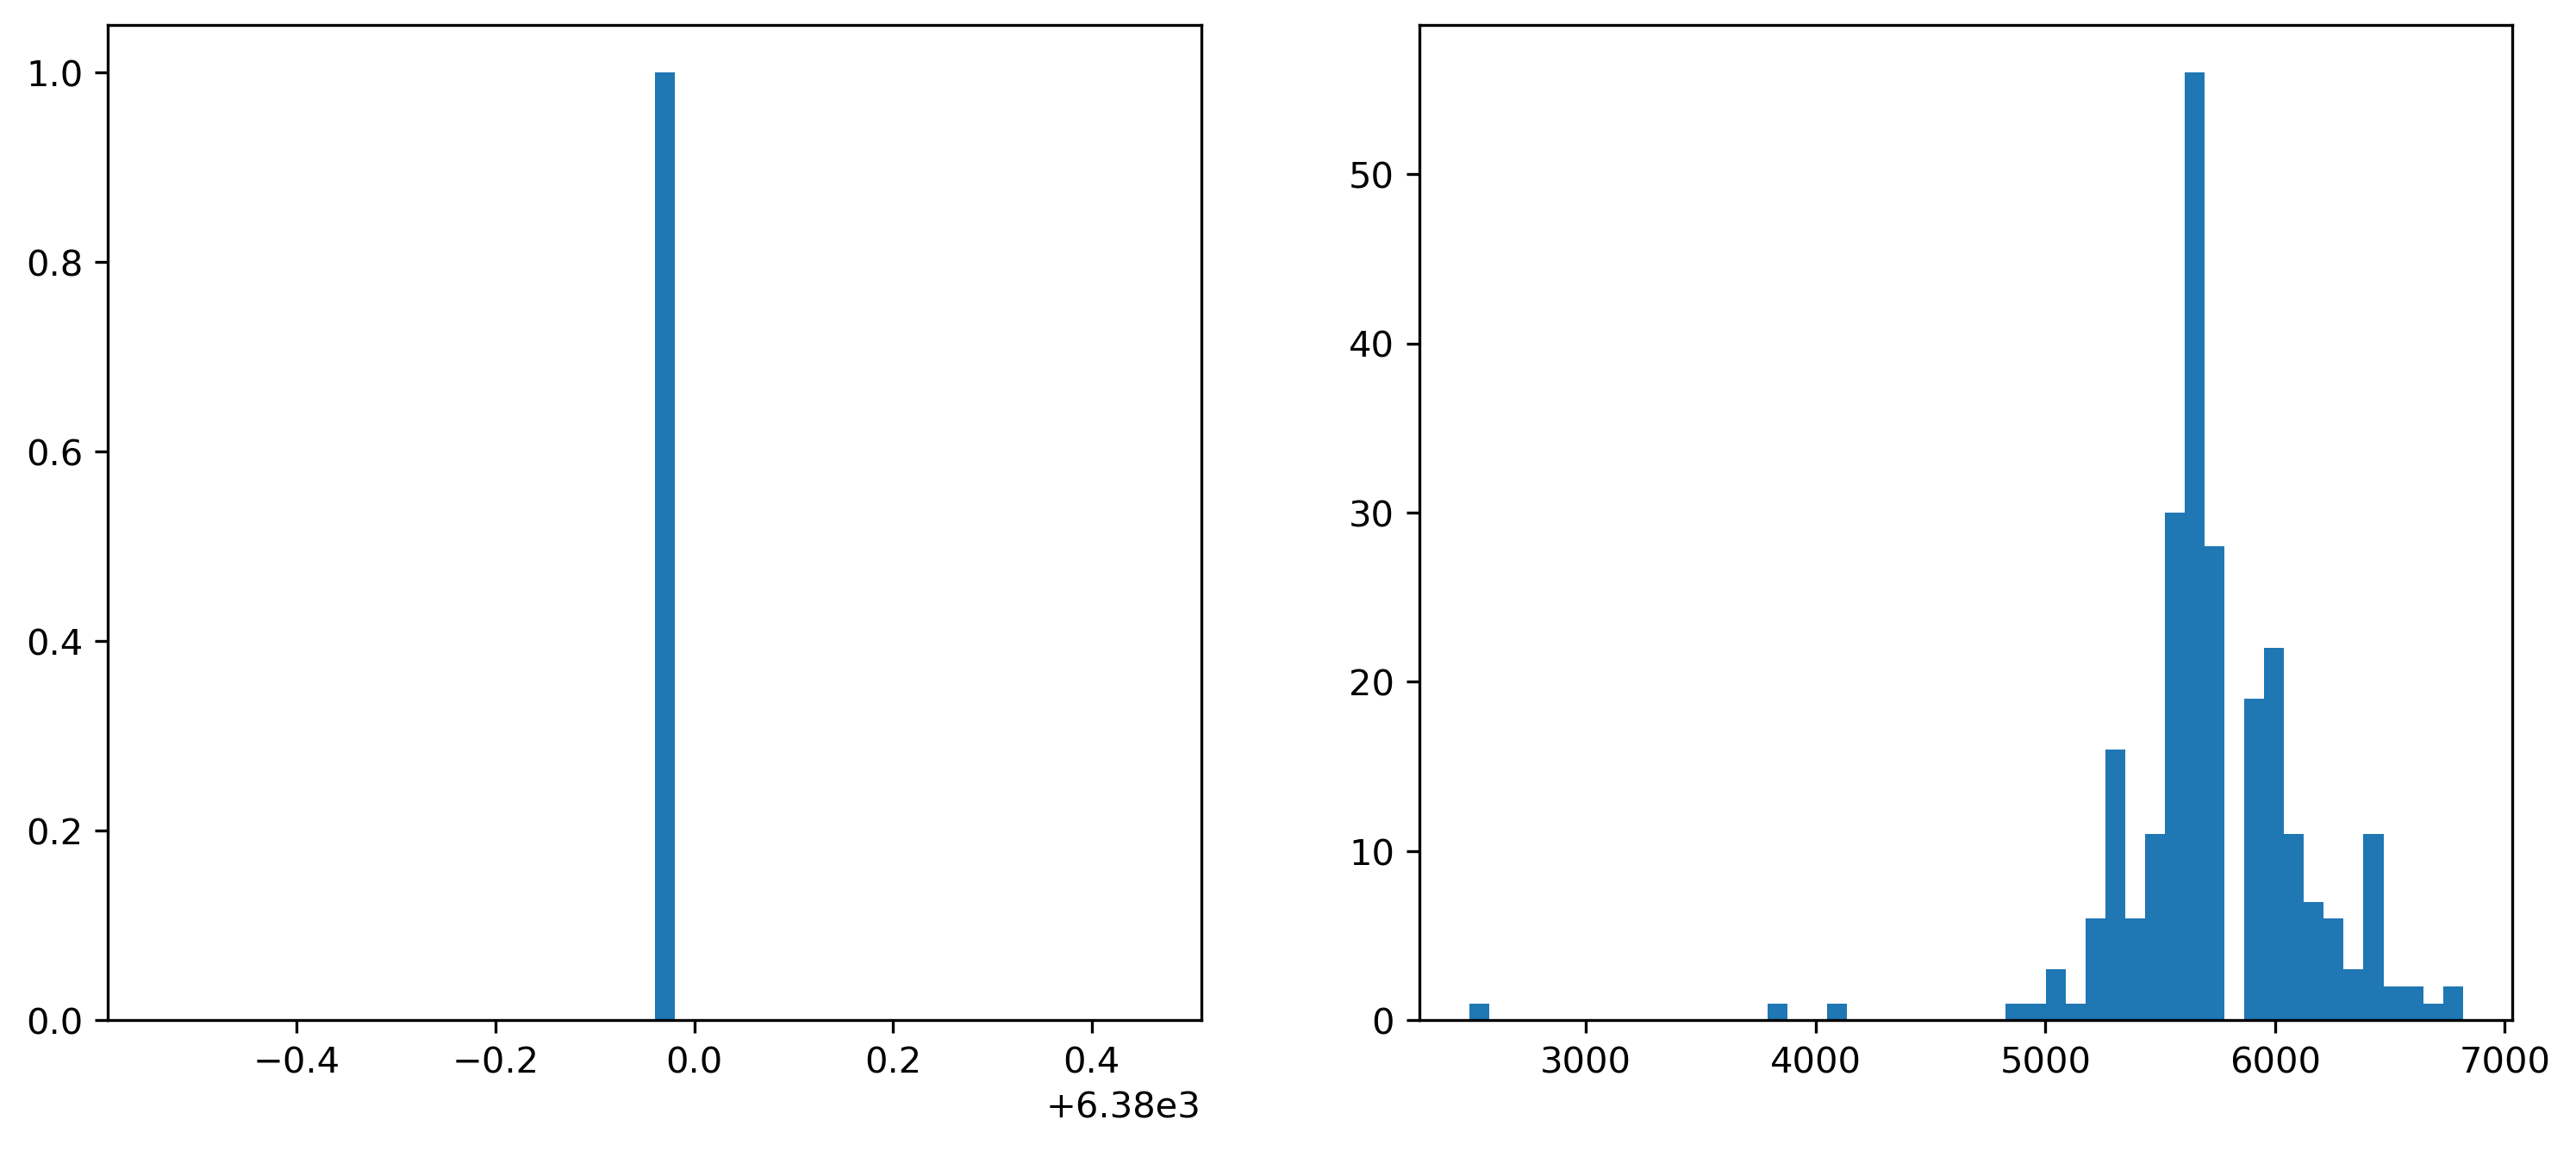

In [13]:
fig,p=plt.subplots(1,2,dpi=300,figsize=(12,5))
_=p[0].hist(G4Result['z'],bins=50)
_=p[1].hist(OptResult['z'],bins=50)

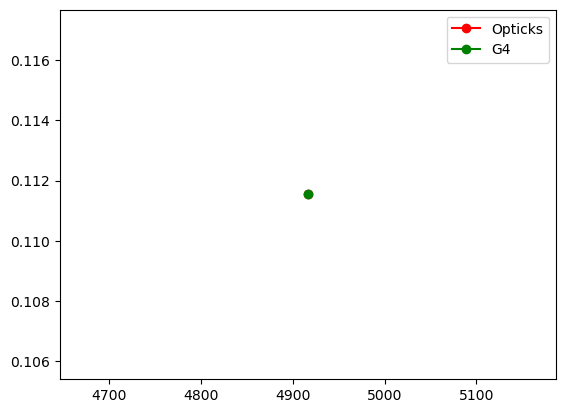

In [14]:
plt.plot(PhotonInfo["OScintPhotons"],PhotonInfo["Time"],color="red",linestyle='-',marker='o',label="Opticks")
plt.plot(PhotonInfo["G4ScintPhotons"],PhotonInfo["Time"],color="green",linestyle='-',marker='o',label="G4")
plt.legend()
plt.show()

In [15]:
print(PhotonInfo)

   G4ScintPhotons  G4CernPhotons  OScintPhotons  OCerenkovPhotons      Time  \
0            4916              0           4916                 0  0.111537   

   eventID  
0        0  
